In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender                601 non-null object
Married               611 non-null object
Dependents            599 non-null object
Education             614 non-null object
Self_Employed         582 non-null object
CoapplicantIncome     614 non-null float64
LoanAmount            592 non-null float64
Loan_Amount_Term      600 non-null float64
Credit_History        564 non-null object
Property_Area         614 non-null object
Loan_Status           614 non-null object
ApplicantIncomeLog    614 non-null float64
dtypes: float64(4), object(8)
memory usage: 57.7+ KB


In [5]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002407,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [6]:
df = df.drop(columns='Loan_ID')

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [9]:
def transform_to_yes_or_no(credit_history):
    if credit_history == 1.0:
        return "Yes"
    if credit_history == 0.0:
        return "No"

    else:
        return credit_history
        

df['Credit_History'] = df['Credit_History'].astype('object')
df['Credit_History'] = df['Credit_History'].apply(transform_to_yes_or_no)

In [10]:
df.describe(include='O')

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,564,614,614
unique,2,2,4,2,2,2,3,2
top,Male,Yes,0,Graduate,No,Yes,Semiurban,Y
freq,489,398,345,480,500,475,233,422


## Some interesting questions

### Is Gender a factor in deciding to if the Loan should be accepted? 

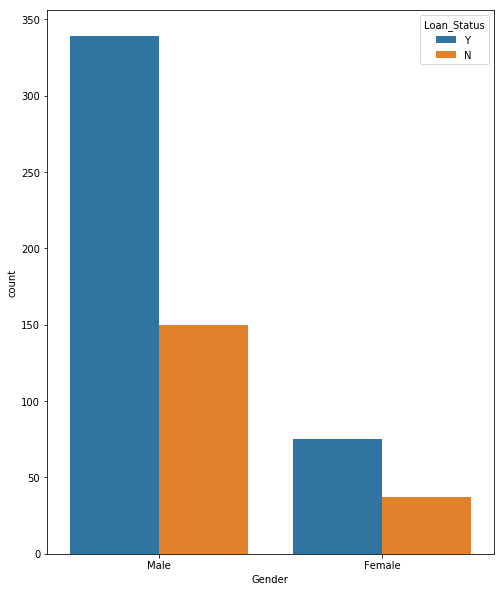

In [15]:
import math
plt.rcParams['figure.figsize'] = 8, 10

sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.show()

### Do Self-Employed applicants have higher Income? 

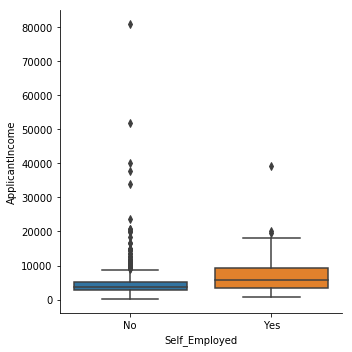

In [12]:
sns.catplot(x='Self_Employed', y='ApplicantIncome', data=df, kind='box')
plt.show()

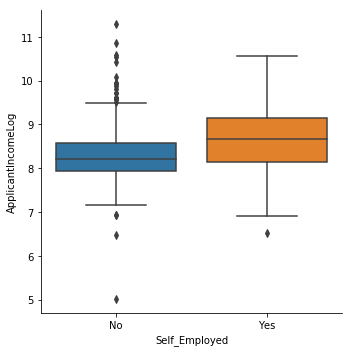

In [13]:
df['ApplicantIncomeLog'] = df['ApplicantIncome'].apply(math.log)
sns.catplot(x='Self_Employed', y='ApplicantIncomeLog', data=df, kind='box')
plt.show()
df = df.drop(columns=['ApplicantIncome'])

## Handling Missing Values

In [19]:
df.isna().any()

Gender                 True
Married                True
Dependents             True
Education             False
Self_Employed          True
CoapplicantIncome     False
LoanAmount             True
Loan_Amount_Term       True
Credit_History         True
Property_Area         False
Loan_Status           False
ApplicantIncomeLog    False
dtype: bool

In [21]:
UNKNOWN_TOKEN = 'UNK'
df['Gender'] = df['Gender'].fillna(UNKNOWN_TOKEN)
df.isna().any()
df.describe(include='O')

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,611,599,614,582,564,614,614
unique,3,2,4,2,2,2,3,2
top,Male,Yes,0,Graduate,No,Yes,Semiurban,Y
freq,489,398,345,480,500,475,233,422


In [23]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col] = df[col].fillna(UNKNOWN_TOKEN)
    else:
        df[col] = df[col].fillna(df[col].median())
        

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog
0,Male,No,0,Graduate,No,0.0,128.0,360.0,Yes,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,1508.0,128.0,360.0,Yes,Rural,N,8.430109
2,Male,Yes,0,Graduate,Yes,0.0,66.0,360.0,Yes,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,2358.0,120.0,360.0,Yes,Urban,Y,7.856707
4,Male,No,0,Graduate,No,0.0,141.0,360.0,Yes,Urban,Y,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,0.0,71.0,360.0,Yes,Rural,Y,7.972466
610,Male,Yes,3+,Graduate,No,0.0,40.0,180.0,Yes,Rural,Y,8.320205
611,Male,Yes,1,Graduate,No,240.0,253.0,360.0,Yes,Urban,Y,8.996157
612,Male,Yes,2,Graduate,No,0.0,187.0,360.0,Yes,Urban,Y,8.933664


In [24]:
df.isna().any()

Gender                False
Married               False
Dependents            False
Education             False
Self_Employed         False
CoapplicantIncome     False
LoanAmount            False
Loan_Amount_Term      False
Credit_History        False
Property_Area         False
Loan_Status           False
ApplicantIncomeLog    False
dtype: bool

## One Hot Encoding

In [25]:
one_hot_df = pd.get_dummies(df) # handle missing values before this, this is just an example

In [26]:
one_hot_df.describe()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,ApplicantIncomeLog,Gender_Female,Gender_Male,Gender_UNK,Married_No,Married_UNK,Married_Yes,...,Self_Employed_UNK,Self_Employed_Yes,Credit_History_No,Credit_History_UNK,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1621.245798,145.752443,342.410423,8.341213,0.182410,0.796417,0.021173,0.346906,0.004886,0.648208,...,0.052117,0.133550,0.144951,0.081433,0.773616,0.291531,0.379479,0.328990,0.312704,0.687296
std,2926.248369,84.107233,64.428629,0.645263,0.386497,0.402991,0.144077,0.476373,0.069786,0.477919,...,0.222445,0.340446,0.352339,0.273722,0.418832,0.454838,0.485653,0.470229,0.463973,0.463973
min,0.000000,9.000000,12.000000,5.010635,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,100.250000,360.000000,7.964677,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1188.500000,128.000000,360.000000,8.246040,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2297.250000,164.750000,360.000000,8.664750,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41667.000000,700.000000,480.000000,11.302204,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
one_hot_df.corr()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,ApplicantIncomeLog,Gender_Female,Gender_Male,Gender_UNK,Married_No,Married_UNK,Married_Yes,...,Self_Employed_UNK,Self_Employed_Yes,Credit_History_No,Credit_History_UNK,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
CoapplicantIncome,1.000000,0.189218,-0.059383,-0.237900,-0.082912,0.082316,-0.007825,-0.075948,-0.032830,0.080496,...,0.075084,-0.016100,-0.011134,0.104297,-0.058795,0.005329,-0.027044,0.022776,0.059187,-0.059187
LoanAmount,0.189218,1.000000,0.036960,0.550849,-0.106904,0.063245,0.109880,-0.146546,0.002430,0.145717,...,0.019960,0.115100,0.000607,0.051967,-0.034473,0.043467,-0.005804,-0.036050,0.033214,-0.033214
Loan_Amount_Term,-0.059383,0.036960,1.000000,-0.031731,0.074030,-0.070288,-0.001992,0.100912,0.019146,-0.103381,...,-0.017886,-0.033739,0.004705,-0.009668,0.002361,0.034321,0.059141,-0.094279,0.022549,-0.022549
ApplicantIncomeLog,-0.237900,0.550849,-0.031731,1.000000,-0.084514,0.060394,0.057790,-0.021424,0.032819,0.016563,...,-0.053097,0.189821,-0.013468,-0.045326,0.040951,0.022500,0.005662,-0.027612,-0.010977,0.010977
Gender_Female,-0.082912,-0.106904,0.074030,-0.084514,1.000000,-0.934236,-0.069469,0.364569,0.027384,-0.367389,...,0.041039,0.000525,0.009170,0.028981,-0.026655,-0.080283,0.108623,-0.034530,0.017987,-0.017987
Gender_Male,0.082316,0.063245,-0.070288,0.060394,-0.934236,1.000000,-0.290893,-0.336818,-0.022579,0.339026,...,-0.027030,-0.027421,-0.021612,-0.026928,0.035780,0.075128,-0.113069,0.044109,-0.025407,0.025407
Gender_UNK,-0.007825,0.109880,-0.001992,0.057790,-0.069469,-0.290893,1.000000,-0.035885,-0.010306,0.037273,...,-0.034486,0.075291,0.035851,-0.002425,-0.028575,0.005230,0.024871,-0.030746,0.022814,-0.022814
Married_No,-0.075948,-0.146546,0.100912,-0.021424,0.364569,-0.336818,-0.035885,1.000000,-0.051069,-0.989310,...,0.044629,-0.004489,0.010938,-0.041852,0.018150,0.006805,-0.005845,-0.000546,0.091478,-0.091478
Married_UNK,-0.032830,0.002430,0.019146,0.032819,0.027384,-0.022579,-0.010306,-0.051069,1.000000,-0.095116,...,-0.016431,-0.027510,-0.028851,-0.020863,0.037905,-0.044949,0.041470,0.000648,-0.047264,0.047264
Married_Yes,0.080496,0.145717,-0.103381,0.016563,-0.367389,0.339026,0.037273,-0.989310,-0.095116,1.000000,...,-0.042086,0.008491,-0.006690,0.044763,-0.023626,-0.000220,-0.000229,0.000449,-0.084281,0.084281


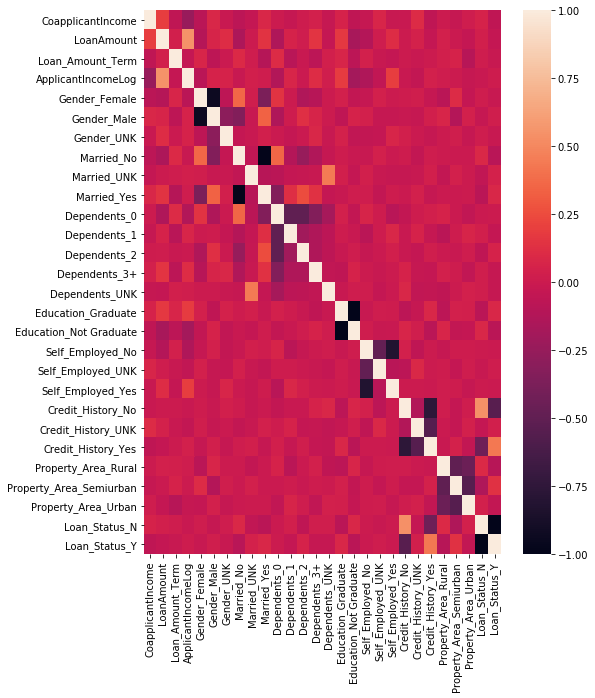

In [28]:
sns.heatmap(one_hot_df.corr())

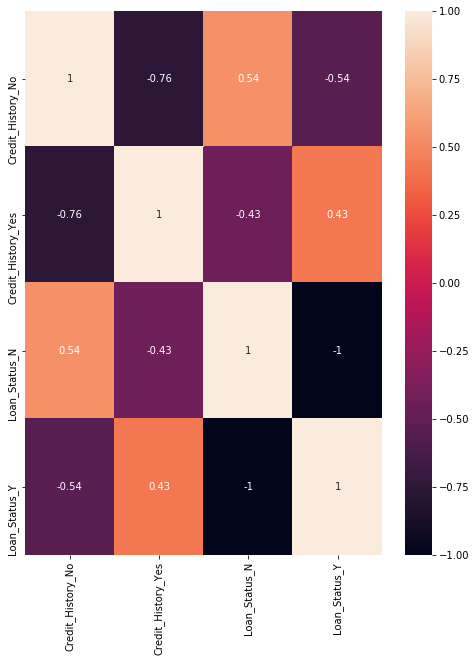

In [30]:
sns.heatmap(one_hot_df[['Credit_History_No', 'Credit_History_Yes', 'Loan_Status_N', 'Loan_Status_Y']].corr(), annot=True)

## Training our first model

In [ ]:
from sklearn.model_selection import train_test_split

X = one_hot_df.drop(columns=['Loan_Status_N', 'Loan_Status_Y'])
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report

predictions = neigh.predict(X_test)

print(classification_report(y_test, predictions))